In [2]:
pip install tensorflow

     |████████████████████████████████| 165.1 MB 133 kB/s eta 0:00:01     |██████████████████████████████▉ | 159.3 MB 3.6 MB/s eta 0:00:02
     |████████████████████████████████| 459 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.2 MB/s eta 0:00:011
     |████████████████████████████████| 65 kB 8.0 MB/s  eta 0:00:01
Processing /Users/ppandhi/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6/termcolor-1.1.0-cp37-none-any.whl
     |████████████████████████████████| 3.3 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 310 kB/s eta 0:00:01
     |████████████████████████████████| 88 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 6.0 MB/s eta 0:00:01
     |██████████████████████████████

In [12]:
import math

import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
x_train.shape, x_test.shape, np.unique(y_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [9]:
class_names = {i:cn for i, cn in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }

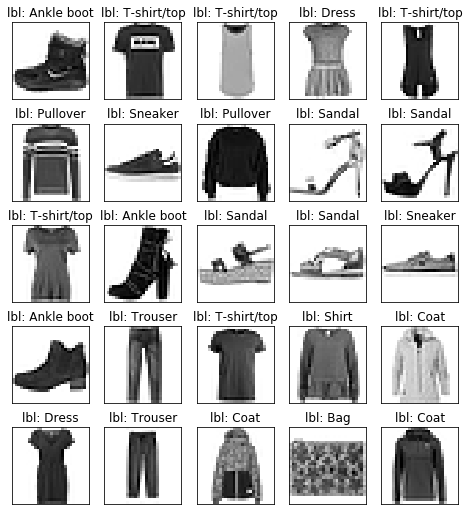

In [14]:
def plot(images, labels, predictions=None):
    """Helper function to plot images, labels and predictions
    Parameters
    ----------
    images : 3D matrix of image
    labels : 1D array
    predictions (optional): 1D array
    """
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3, n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(f"lbl: {class_names[y_true]}")
        
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
    
        ax.set_xticks([])
        ax.set_yticks([])

# plot first few images
plot(x_train[:25], y_train[:25])    

In [16]:
 # scale the values between 0 and 1 for both training and testing set
x_train = x_train / 255.0
x_test = x_test / 255.0

In [22]:
x_train.shape

(60000, 28, 28)

In [21]:
model = keras.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=60, epochs=10, validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 1s 1ms/step - loss: 0.5407 - accuracy: 0.8134 - val_loss: 0.4271 - val_accuracy: 0.8468
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3985 - accuracy: 0.8593 - val_loss: 0.4087 - val_accuracy: 0.8525
Epoch 3/10
800/800 [==============================] - 1s 976us/step - loss: 0.3544 - accuracy: 0.8721 - val_loss: 0.3655 - val_accuracy: 0.8694
Epoch 4/10
800/800 [==============================] - 1s 993us/step - loss: 0.3316 - accuracy: 0.8795 - val_loss: 0.3425 - val_accuracy: 0.8808
Epoch 5/10
800/800 [==============================] - 1s 946us/step - loss: 0.3081 - accuracy: 0.8870 - val_loss: 0.3419 - val_accuracy: 0.8791
Epoch 6/10
800/800 [==============================] - 1s 931us/step - loss: 0.2929 - accuracy: 0.8927 - val_loss: 0.3348 - val_accuracy: 0.8780
Epoch 7/10
800/800 [==============================] - 1s 946us/step - loss: 0.2800 - accuracy: 0.8969 - val_loss: 0.3261 - val_accuracy: 0.8

In [23]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy*100:.2f} %")

313/313 [==============================] - 0s 872us/step - loss: 0.3466 - accuracy: 0.8762
Accuracy = 87.62 %


In [28]:
probs = model.predict(x_test)
print(model.predict_classes(x_test))

[9 2 1 ... 8 1 5]


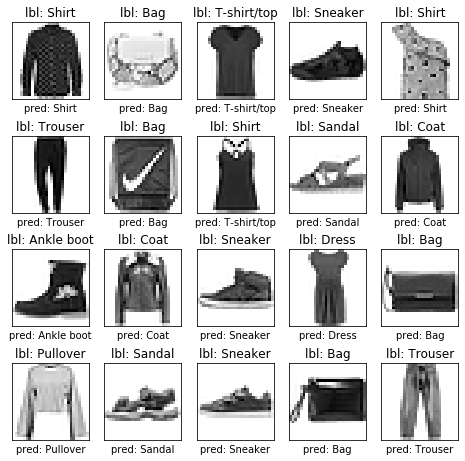

In [26]:
preds = model.predict_classes(x_test)

# plot 20 random data
rand_idxs = np.random.permutation(len(x_test))[:20]

plot(x_test[rand_idxs], y_test[rand_idxs], preds[rand_idxs])

In [29]:
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(x_test)-1, description="Image index")

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(x_test[i], cmap=plt.cm.binary)
    ax1.set_title(f"lbl: {class_names[y_test[i]]}")
    ax1.set_xlabel(f"pred: {class_names[preds[i]]}")


    ax2.bar(x=[class_names[i] for i in range(10)], height=probs[i]*100)
    plt.xticks(rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', max=9999), Output()), _dom_classes=('widge…